In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.descriptivestats import sign_test

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#for X
n1 = 300
sample1 = stats.chi2(5).rvs(n1) 

mean1 = np.mean(sample1)
var1 = np.var(sample1)
std1 = np.std(sample1)


print("X1: mean1 = %.3f; var1 = %.3f; std1 = %.3f; n1 = %.3f" % (mean1, var1, std1, n1))

X1: mean1 = 4.696; var1 = 10.081; std1 = 3.175; n1 = 300.000


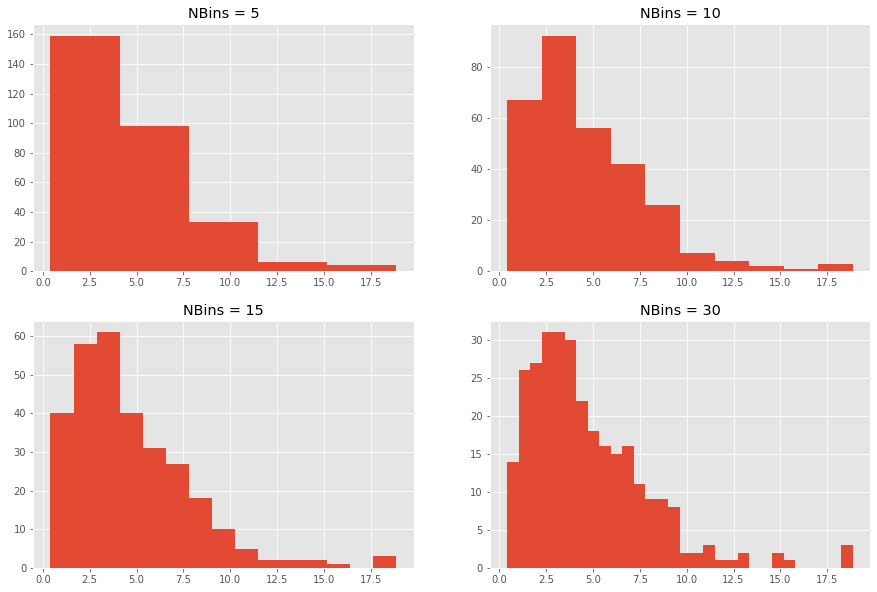

In [3]:
index = 0
fig, ax = plt.subplots(2, 2, figsize=(15,10))

bins = [5, 10, 15, 30]
for i in range(2):
    for j in range(2):
        ax[i,j].hist(sample1, bins = bins[index])
        ax[i, j].set_title('NBins = {}'.format(bins[index]))
        index += 1
        
fig.subplots_adjust(hspace = 0.2) 

In [4]:
def mean(a):
    b = [0]*(len(a) - 1)
    for i in range(0, len(a)-1):
        b[i] = ((a[i+1] + a[i]) / 2)
    return b

def getM(mean, frequencies, n):
    m = 0
    for i in range(0, len(mean)):
        m += mean[i] * frequencies[i] 
    return m/n

def getSigma(mean, frequencies, m, n):
    s = 0
    for i in range(0, len(mean)):
        s += (mean[i] - m)**2 * frequencies[i]
    return (s / (n - 1))**(1/2)

def getNP(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx += (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx += freq[i]
    if (npx >= 5):
      n.append(nx)
      np.append(npx)
      nx = 0
      npx = 0
    elif (npx < 5) and (i == len(val) - 2):
      n[len(n) - 1] = nx + n[len(n) - 1]
      np[len(np) - 1] = npx + np[len(np) - 1]    
  return (n, np)

def getNP_no_merge(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx = (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx = freq[i]
    n.append(nx)
    np.append(npx)
     
  return (n, np)

def getZ(n, np):
    z = 0
    for i in range(0, len(n)):
        z += (n[i] - np[i])**2 / np[i]
    return z

In [5]:
alpha = 0.05

# Критерий хи-квадрат: N

Number of grouping intervals 5
chi-squared criteria for N: z = 157.428; p-value = 0.000


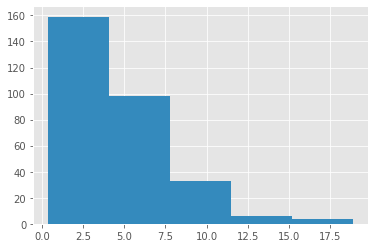

In [6]:
#критерий хи-квадрат

frequencies_5 = plt.hist(sample1, bins=5)[0]
values_5 = plt.hist(sample1, bins=5)[1]


m = getM(mean(values_5), frequencies_5, n1)
sigma = getSigma(mean(values_5), frequencies_5, m, n1)
new_n, new_np = getNP_no_merge(values_5, frequencies_5 , n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 5")
print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

Number of grouping intervals 10
chi-squared criteria for N: z = 38.359; p-value = 0.000


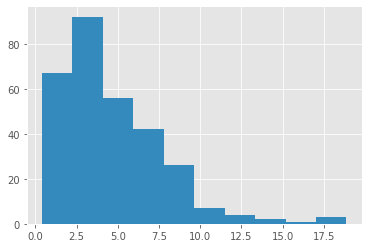

In [7]:
#критерий хи-квадрат

frequencies_10 = plt.hist(sample1, bins=10)[0]
values_10 = plt.hist(sample1, bins=10)[1]


m = getM(mean(values_10), frequencies_10, n1)
sigma = getSigma(mean(values_10), frequencies_10, m, n1)
new_n, new_np = getNP(values_10, frequencies_10, n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 10")
print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

Number of grouping intervals 15
chi-squared criteria for N: z = 42.653; p-value = 0.000


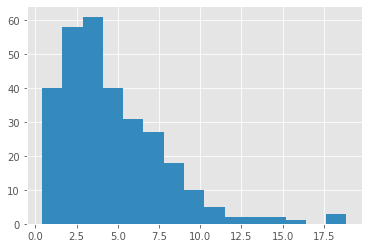

In [8]:
#критерий хи-квадрат

frequencies_15 = plt.hist(sample1, bins=15)[0]
values_15 = plt.hist(sample1, bins=15)[1]


m = getM(mean(values_15), frequencies_15, n1)
sigma = getSigma(mean(values_15), frequencies_15, m, n1)
new_n, new_np = getNP(values_15, frequencies_15, n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 15")
print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

Number of grouping intervals 30
chi-squared criteria for N : z = 47.667; p-value = 0.000


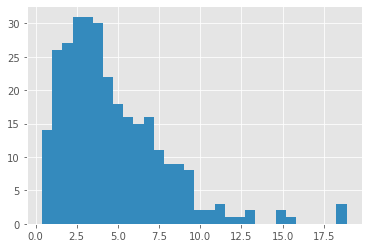

In [9]:
#критерий хи-квадрат

frequencies_30 = plt.hist(sample1, bins=30)[0]
values_30 = plt.hist(sample1, bins=30)[1]


m = getM(mean(values_30), frequencies_30, n1)
sigma = getSigma(mean(values_30), frequencies_30, m, n1)
new_n, new_np = getNP(values_30, frequencies_30, n1, m, sigma)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 30")
print("chi-squared criteria for N : z = %.3f; p-value = %.3f" % (z, p_value))

# критерий хи-квадрат: R

In [10]:
#критерий хи-квадрат для R
def getNP_R(val, freq, n1, a, b):
    n  = list()
    np = list()
    npx = 0
    nx = 0
    dis = stats.uniform(loc = a, scale = b - a)
    for i in range(0, len(val) - 1):
        npx += (dis.cdf(val[i + 1]) - dis.cdf(val[i])) * n1
        nx += freq[i]
        if npx > 5:
            n.append(nx)
            np.append(npx)
            nx = 0
            npx = 0
        elif (npx < 5) and (i == len(val) - 2):
            n[len(n) - 1] = nx + n[len(n) - 1]
            np[len(np) - 1] = npx + np[len(np) - 1]
    return (n, np)


In [11]:
#5 intervals
m = getM(mean(values_5), frequencies_5, n1 ) 
sigma = getSigma(mean(values_5), frequencies_5, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP(values_5, frequencies_5 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 5")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))


Number of grouping intervals 5
chi-squared criteria for R: z = 458.804; p-value = 0.000


In [12]:
#10 intervals
m = getM(mean(values_10), frequencies_10, n1 ) 
sigma = getSigma(mean(values_10), frequencies_10, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP(values_10, frequencies_10 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 10")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))


Number of grouping intervals 10
chi-squared criteria for R: z = 485.916; p-value = 0.000


In [13]:
#15 intervals
m = getM(mean(values_15), frequencies_15, n1 ) 
sigma = getSigma(mean(values_15), frequencies_15, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP(values_15, frequencies_15 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 15")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))


Number of grouping intervals 15
chi-squared criteria for R: z = 495.724; p-value = 0.000


In [14]:
#30 intervals
m = getM(mean(values_30), frequencies_30, n1 ) 
sigma = getSigma(mean(values_30), frequencies_30, m, n1 )
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))

new_n, new_np = getNP(values_30, frequencies_30 , n1, a, b)

z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 30")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))


Number of grouping intervals 30
chi-squared criteria for R: z = 509.663; p-value = 0.000


# Критерий хи_квадрат: X^2(5)

In [15]:
def getNP(val, freq, n1):
    n  = list()
    np = list()
    npx = 0
    nx = 0
    dis = stats.chi2(5)
    for i in range(0, len(val) - 1):
        npx += (dis.cdf(val[i + 1]) - dis.cdf(val[i])) * n1
        nx += freq[i]
        if npx > 5:
            n.append(nx)
            np.append(npx)
            nx = 0
            npx = 0
        elif (npx < 5) and (i == len(val) - 2):
            n[len(n) - 1] = nx + n[len(n) - 1]
            np[len(np) - 1] = npx + np[len(np) - 1]
    return (n, np)

In [16]:
#5 intervals
new_n, new_np = getNP(values_5, frequencies_5 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 5")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 5
chi-squared criteria for R: z = 5.517; p-value = 0.127
Критическое значение: 5.991


In [17]:
#10 intervals
new_n, new_np = getNP(values_10, frequencies_10 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 10")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 10
chi-squared criteria for R: z = 9.595; p-value = 0.286
Критическое значение: 12.592


In [18]:
#15 intervals
new_n, new_np = getNP(values_15, frequencies_15 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 15")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 15
chi-squared criteria for R: z = 8.481; p-value = 0.776
Критическое значение: 15.507


In [19]:
#30 intervals
new_n, new_np = getNP(values_30, frequencies_30 , n1)

z = getZ(new_n, new_np)
k = len(new_n)
r = 1

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("Number of grouping intervals 30")
print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))
print('Критическое значение: %.3f' % (stats.chi2(k-r-1).ppf(1 - alpha)))

Number of grouping intervals 30
chi-squared criteria for R: z = 11.824; p-value = 0.379
Критическое значение: 27.587


# Критерий Колмгорова


In [20]:
alpha = 0.05
m = sample1.mean()
sigma = sample1.std()
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))
test_N = stats.kstest(sample1, stats.norm(m, sigma).cdf)
test_R = stats.kstest(sample1, stats.uniform(a, b - a).cdf)
test_chi = stats.kstest(sample1, stats.chi2(5).cdf)

print('Нормальное распределение: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_N[0] , p_value = test_N[1]))
print('Равномерное распределение: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_R[0] , p_value = test_R[1]))
print('Распределение хи-квадрат: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_chi[0] , p_value = test_chi[1]))

Нормальное распределение: z = 0.116, p-value = 0.001
Равномерное распределение: z = 0.128, p-value = 0.000
Распределение хи-квадрат: z = 0.078, p-value = 0.047


# Двухвыборочные критерии

In [21]:
#for Y
n2 = 300
sample2 = stats.chi2(5).rvs(n1) 

mean2 = np.mean(sample1)
var2 = np.var(sample1)
std2 = np.std(sample1)

print("Y: mean2 = %.3f; var2 = %.3f; std2 = %.3f; n2 = %.3f" % (mean1, var1, std1, n1))

Y: mean2 = 4.696; var2 = 10.081; std2 = 3.175; n2 = 300.000


Сhi-squared test: z = 62.095, p-value = 0.000


array([101.,  88.,  68.,  24.,  10.,   4.,   2.,   1.,   1.,   1.])

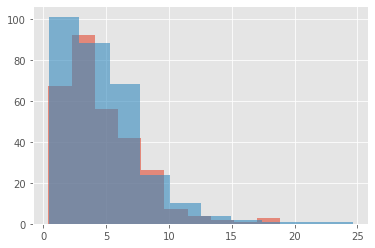

In [22]:
#Chi-squared

result = plt.hist(sample1,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]

result = plt.hist(sample2,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]

ans = stats.chisquare(f_obs = frequencies_X, f_exp = frequencies_Y)

print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))
frequencies_Y

In [23]:
#KS-test

ans = stats.ks_2samp(sample1, sample2)
print('KS-test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

KS-test: z = 0.047, p-value = 0.900


In [29]:
#Sign test
sample2 = stats.chi2(5).rvs(100)
ans = sign_test(sample1, sample2)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))
ans[0]

ValueError: ignored

In [25]:
#U-test

ans = stats.ranksums(sample1, sample2)
print('U-test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

ans1 = stats.wilcoxon(sample1, sample2)
ans1

U-test: z = 0.040, p-value = 0.968


WilcoxonResult(statistic=22193.0, pvalue=0.7994710870935968)

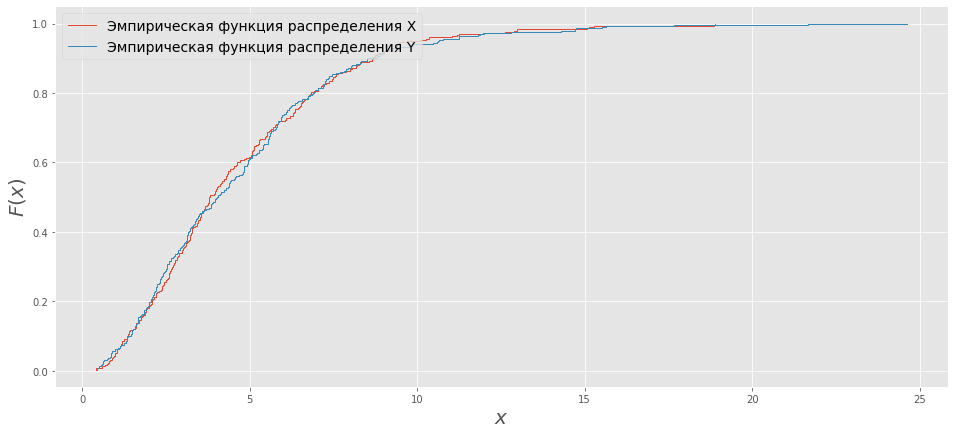

In [26]:
#ЭФР
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(16, 7))


ecdfX = ECDF(sample1)  
ecdfY = ECDF(sample2)
plt.step(ecdfX.x, ecdfX.y,lw=1, label='Эмпирическая функция распределения X')
plt.step(ecdfY.x, ecdfY.y,lw=1, label='Эмпирическая функция распределения Y')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

plt.legend(fontsize=14, loc=2)
plt.show()

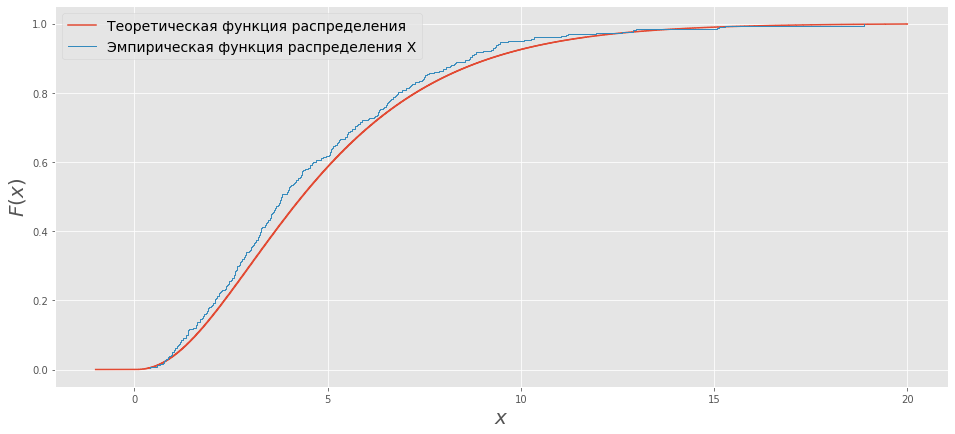

In [27]:
plt.figure(figsize=(16, 7))

x = np.linspace(-1, 20, 1000)
plt.step(x, stats.chi2(5).cdf(x), label='Теоретическая функция распределения')

ecdfX = ECDF(sample1)  

plt.step(ecdfX.x, ecdfX.y,lw=1, label='Эмпирическая функция распределения X')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

plt.legend(fontsize=14, loc=2)
plt.show()

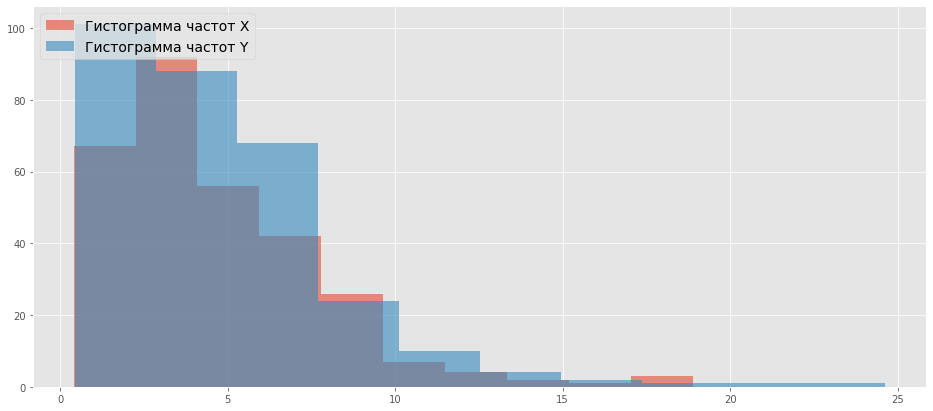

In [28]:
plt.figure(figsize=(16, 7))

plt.hist(sample1,  bins=10, alpha=0.6, label='Гистограмма частот X')
plt.hist(sample2,  bins=10, alpha=0.6, label='Гистограмма частот Y')

plt.legend(fontsize=14, loc=2)